In [15]:
%run ..\Functions.ipynb

<>:32: SyntaxWarning: invalid escape sequence '\c'
<>:34: SyntaxWarning: invalid escape sequence '\c'
C:\Users\ntr002\AppData\Local\Temp\ipykernel_11832\3907137082.py:32: SyntaxWarning: invalid escape sequence '\c'
  text = f'$y = {m:.2f} \cdot x {b:.2f}$'
C:\Users\ntr002\AppData\Local\Temp\ipykernel_11832\3907137082.py:34: SyntaxWarning: invalid escape sequence '\c'
  text = f'$y = {m:.2f} \cdot x + {b:.2f}$'


# difference maps

In [2]:
nc1= r"E:\WaPORQA\AgERA5\Processed\Yearly\ERA5_Grid\2018-2022.nc"
ds1 = xr.open_dataset(nc1)
da1 = ds1.mean(dim='time')

nc2= r"E:\WaPORQA\ERA5\Processed\Yearly\2018-2022.nc"
ds2 = xr.open_dataset(nc2)
da2 = ds2.mean(dim='time')

nc3= r"E:\WaPORQA\GEOS5\Processed\Yearly\ERA5_Grid\2018-2022.nc"
ds3 = xr.open_dataset(nc3)
da3 = ds3.mean(dim='time')

In [3]:
import matplotlib.colors as mcolors

<>:3: SyntaxWarning: invalid escape sequence '\c'
<>:3: SyntaxWarning: invalid escape sequence '\c'
C:\Users\ntr002\AppData\Local\Temp\ipykernel_2812\271946857.py:3: SyntaxWarning: invalid escape sequence '\c'
  var_name = ['Air temperature ($^\circ\mathrm{C}$)', 'Windspeed ($ms^{-1}$)',


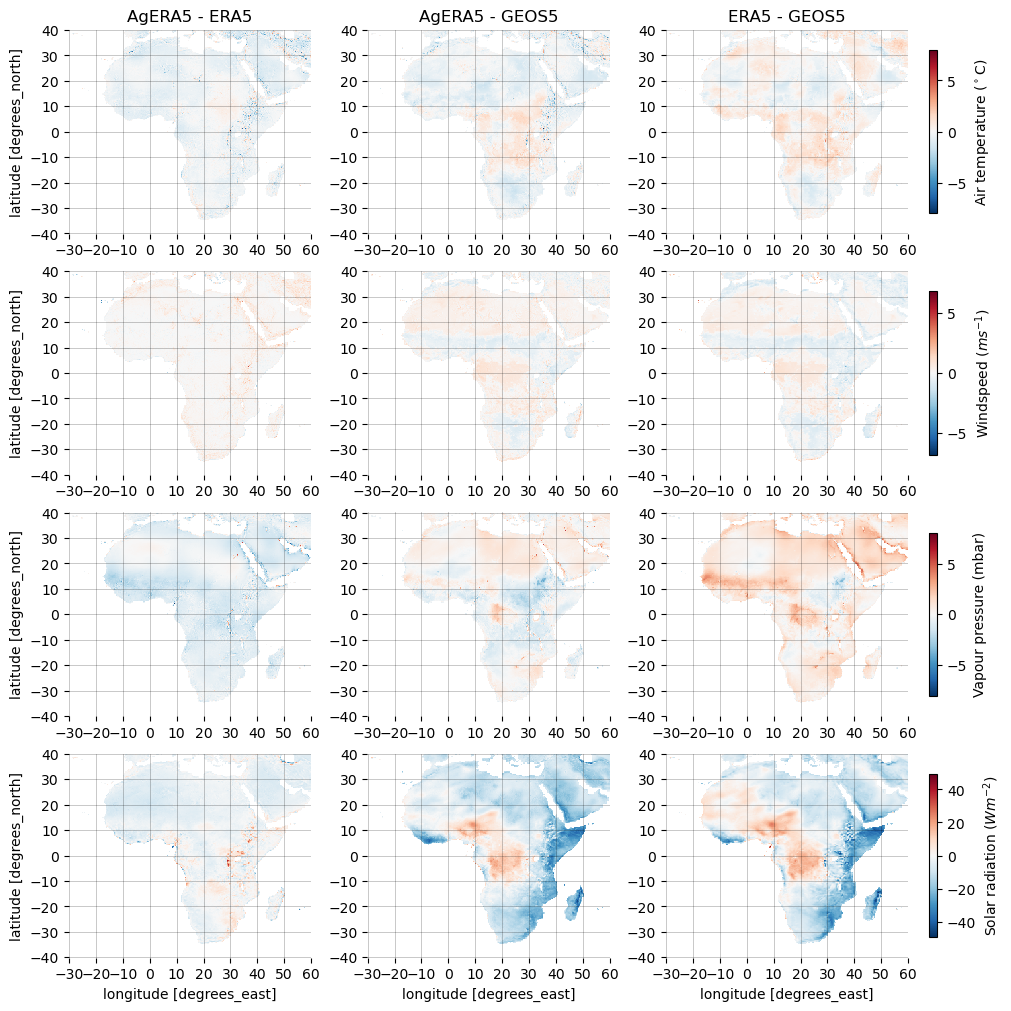

In [43]:
## params
variables=['t_air','u','vp','ra']
var_name = ['Air temperature ($^\circ\mathrm{C}$)', 'Windspeed ($ms^{-1}$)',
            'Vapour pressure (mbar)','Solar radiation ($Wm^{-2}$)']
## plot
fig, axs = plt.subplots(4, 3, figsize=(10, 10), layout="constrained")
for i,axr in enumerate(axs):
    var=variables[i]
    diff1_2=da1[var]-da2[var] 
    diff1_3=da1[var]-da3[var] 
    diff2_3=da2[var]-da3[var]
    #masking
    diff1_2=diff1_2.where(~da1[var].isnull(), np.nan)
    diff1_3=diff1_3.where(~da1[var].isnull(), np.nan)    
    diff2_3=diff2_3.where(~da1[var].isnull(), np.nan)  
    #
    vmin=float(min(da1[var].min(),da2[var].min(),da3[var].min()))
    vmax=float(max(da1[var].max(),da2[var].max(),da3[var].max()))
    difmin=float(min(diff1_2.min(),diff1_3.min(),diff2_3.min()))
    difmax=float(max(diff1_2.max(),diff1_3.max(),diff2_3.max()))
    diflim = max(abs(difmin),abs(difmax))
    #plot   
    im=subplot_image(diff1_2,axr[0], vmin=-diflim, vmax=diflim,cmap='RdBu_r')
    subplot_image(diff1_3,axr[1], vmin=-diflim, vmax=diflim,cmap='RdBu_r')
    subplot_image(diff2_3,axr[2], vmin=-diflim, vmax=diflim,cmap='RdBu_r')
    cbar= fig.colorbar(im, ax=axs[i, -1], shrink=0.8)  
    cbar.ax.set_ylabel(var_name[i])  
    # customize
    if i == 0:
        axr[0].set_title('AgERA5 - ERA5')
        axr[1].set_title('AgERA5 - GEOS5')
        axr[2].set_title('ERA5 - GEOS5')
    if i !=3:
        axr[0].set_xlabel('')  
        axr[1].set_xlabel('')  
        axr[2].set_xlabel('')  
    axr[1].set_ylabel('')  
    axr[2].set_ylabel('')  
plt.savefig('./figures/all_diff_plots_2018-2022.png',bbox_inches='tight')


<>:3: SyntaxWarning: invalid escape sequence '\c'
<>:3: SyntaxWarning: invalid escape sequence '\c'
C:\Users\ntr002\AppData\Local\Temp\ipykernel_11832\3183980481.py:3: SyntaxWarning: invalid escape sequence '\c'
  var_name = ['Air temperature ($^\circ\mathrm{C}$)', 'Windspeed ($ms^{-1}$)',


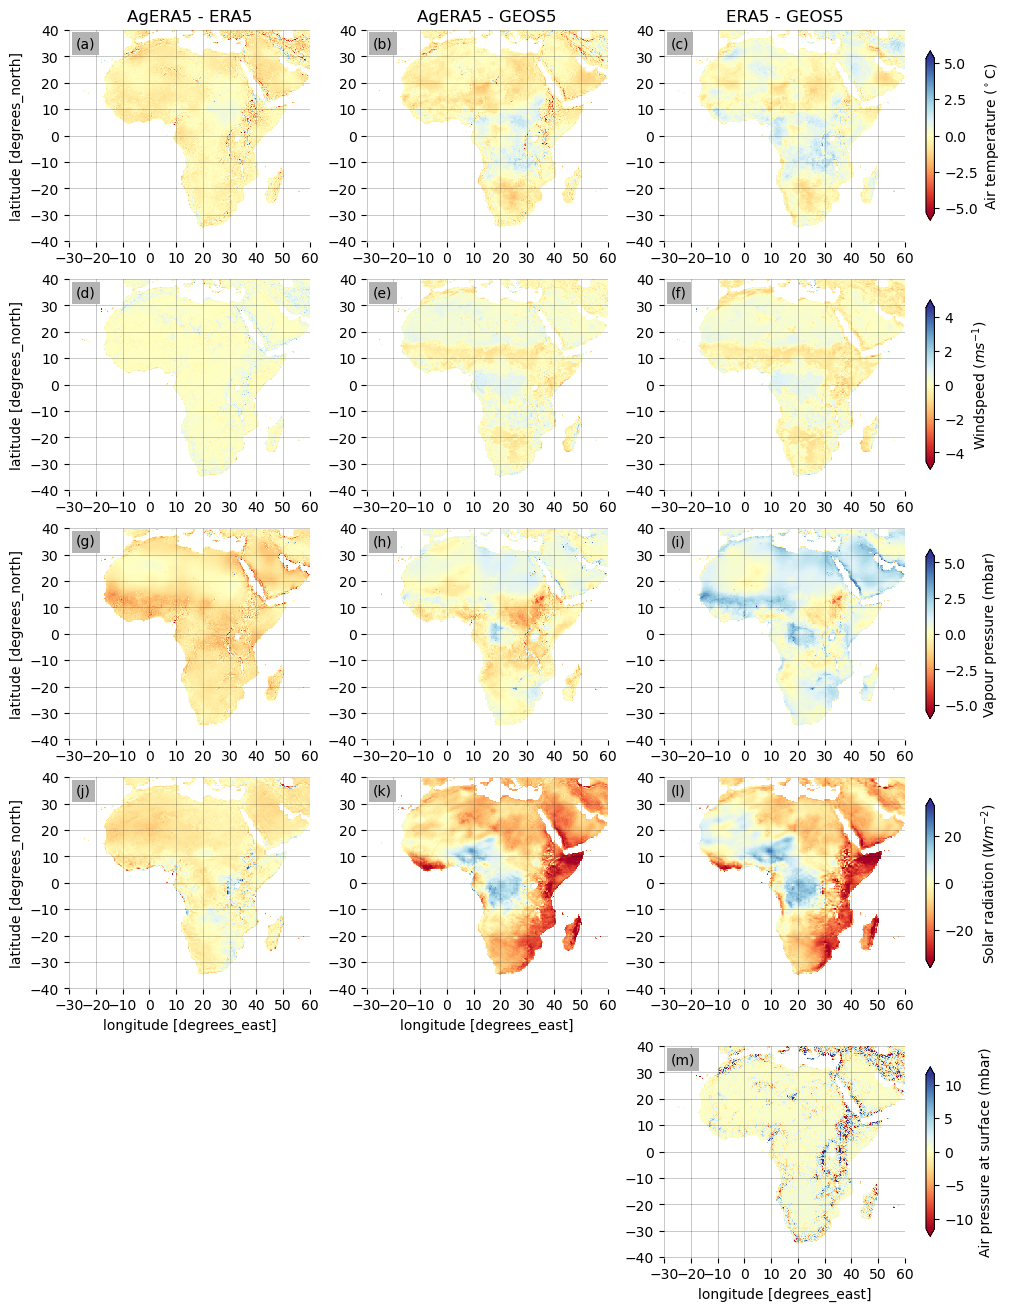

In [12]:
## params
variables=['t_air','u','vp','ra','p_air']
var_name = ['Air temperature ($^\circ\mathrm{C}$)', 'Windspeed ($ms^{-1}$)',
            'Vapour pressure (mbar)','Solar radiation ($Wm^{-2}$)','Air pressure at surface (mbar)']
## plot
fig, axs = plt.subplots(5, 3, figsize=(10, 13), layout="constrained")
sublabels = [['(a)','(b)','(c)'],['(d)','(e)','(f)'],
          ['(g)','(h)','(i)'],['(j)','(k)','(l)'],['','','(m)']]
for i,axr in enumerate(axs):
    var=variables[i]
    if i !=4:
        diff1_2=da1[var]-da2[var] 
        diff1_3=da1[var]-da3[var] 
        diff2_3=da2[var]-da3[var]  
        #masking
        diff1_2=diff1_2.where(~da1[var].isnull(), np.nan)
        diff1_3=diff1_3.where(~da1[var].isnull(), np.nan)    
        diff2_3=diff2_3.where(~da1[var].isnull(), np.nan)  
        #
        vmin=float(min(da1[var].min(),da2[var].min(),da3[var].min()))
        vmax=float(max(da1[var].max(),da2[var].max(),da3[var].max()))
        difmin=float(min(diff1_2.min(),diff1_3.min(),diff2_3.min()))
        difmax=float(max(diff1_2.max(),diff1_3.max(),diff2_3.max()))
        diflim = max(abs(difmin),abs(difmax))/1.5
        #plot   
        im=subplot_image(diff1_2,axr[0], vmin=-diflim, vmax=diflim,cmap='RdYlBu')
        subplot_image(diff1_3,axr[1], vmin=-diflim, vmax=diflim,cmap='RdYlBu')
        subplot_image(diff2_3,axr[2], vmin=-diflim, vmax=diflim,cmap='RdYlBu')
        cbar= fig.colorbar(im, ax=axs[i, -1], shrink=0.8,extend='both')  
        cbar.ax.set_ylabel(var_name[i])  
        # customize
        if i == 0:
            axr[0].set_title('AgERA5 - ERA5')
            axr[1].set_title('AgERA5 - GEOS5')
            axr[2].set_title('ERA5 - GEOS5')
        if i !=3:
            axr[0].set_xlabel('')  
            axr[1].set_xlabel('')  
            axr[2].set_xlabel('') 
        else:
            axr[2].set_xlabel('') 
    else:
        diff2_3=da2[var]-da3[var] #ERA5 - GEOS5
        diff2_3=diff2_3.where(~da1['t_air'].isnull(), np.nan)
        vmin=float(min(da2[var].min(),da3[var].min()))
        vmax=float(max(da2[var].max(),da3[var].max()))
        difmin=float(diff2_3.min())
        difmax=float(diff2_3.max())
        diflim = max(abs(difmin),abs(difmax))/4 
        im=subplot_image(diff2_3,axr[2], vmin=-diflim, vmax=diflim,cmap='RdYlBu')
        cbar= fig.colorbar(im, ax=axs[i, -1], shrink=0.8,extend='both')  
        cbar.ax.set_ylabel(var_name[i])   
        axr[0].set_frame_on(False)
        axr[1].set_frame_on(False)
        axr[0].set_xticks([])
        axr[1].set_xticks([])
        axr[1].set_yticks([])    
        axr[0].set_yticks([])
    axr[1].set_ylabel('')  
    axr[2].set_ylabel('')
for i in range(5):
    for j in range(3):
        axs[i,j].annotate(
        sublabels[i][j],
        xy=(0, 1), xycoords='axes fraction',
        xytext=(+0.5, -0.5), textcoords='offset fontsize',
        fontsize='medium', verticalalignment='top', 
        bbox=dict(facecolor='0.7', edgecolor='none', pad=3.0))
plt.savefig('./figures/all_diff_plots_2018-2022.png',bbox_inches='tight')


<>:3: SyntaxWarning: invalid escape sequence '\c'
<>:3: SyntaxWarning: invalid escape sequence '\c'
C:\Users\ntr002\AppData\Local\Temp\ipykernel_8848\978572774.py:3: SyntaxWarning: invalid escape sequence '\c'
  var_name = ['Air temperature ($^\circ\mathrm{C}$)', 'Windspeed ($ms^{-1}$)',


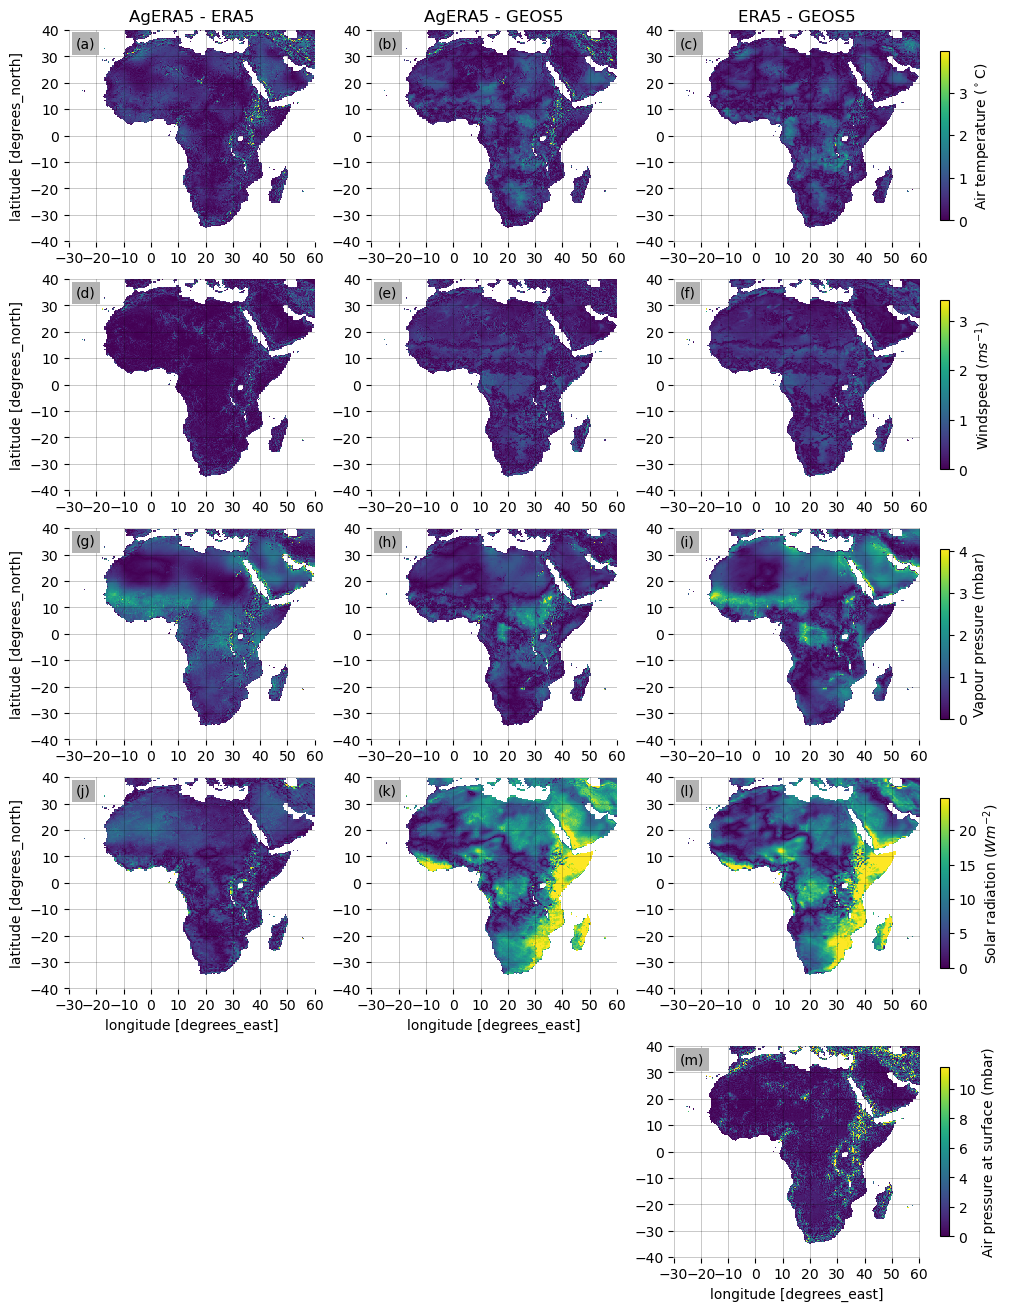

In [16]:
## params
variables=['t_air','u','vp','ra','p_air']
var_name = ['Air temperature ($^\circ\mathrm{C}$)', 'Windspeed ($ms^{-1}$)',
            'Vapour pressure (mbar)','Solar radiation ($Wm^{-2}$)','Air pressure at surface (mbar)']
## plot
fig, axs = plt.subplots(5, 3, figsize=(10, 13), layout="constrained")
sublabels = [['(a)','(b)','(c)'],['(d)','(e)','(f)'],
          ['(g)','(h)','(i)'],['(j)','(k)','(l)'],['','','(m)']]
for i,axr in enumerate(axs):
    var=variables[i]
    if i !=4:
        diff1_2=abs(da1[var]-da2[var]) 
        diff1_3=abs(da1[var]-da3[var]) 
        diff2_3=abs(da2[var]-da3[var])  
        #masking
        diff1_2=diff1_2.where(~da1[var].isnull(), np.nan)
        diff1_3=diff1_3.where(~da1[var].isnull(), np.nan)    
        diff2_3=diff2_3.where(~da1[var].isnull(), np.nan)  
        #
        vmin=float(min(da1[var].min(),da2[var].min(),da3[var].min()))
        vmax=float(max(da1[var].max(),da2[var].max(),da3[var].max()))
        difmin=float(min(diff1_2.min(),diff1_3.min(),diff2_3.min()))
        difmax=float(max(diff1_2.max(),diff1_3.max(),diff2_3.max()))
        diflim = max(abs(difmin),abs(difmax))/2
        #plot   
        im=subplot_image(diff1_2,axr[0], vmin=0, vmax=diflim,cmap='viridis')
        subplot_image(diff1_3,axr[1], vmin=0, vmax=diflim,cmap='viridis')
        subplot_image(diff2_3,axr[2], vmin=0, vmax=diflim,cmap='viridis')
        cbar= fig.colorbar(im, ax=axs[i, -1], shrink=0.8)  
        cbar.ax.set_ylabel(var_name[i])  
        # customize
        if i == 0:
            axr[0].set_title('AgERA5 - ERA5')
            axr[1].set_title('AgERA5 - GEOS5')
            axr[2].set_title('ERA5 - GEOS5')
        if i !=3:
            axr[0].set_xlabel('')  
            axr[1].set_xlabel('')  
            axr[2].set_xlabel('') 
        else:
            axr[2].set_xlabel('') 
    else:
        diff2_3=abs(da2[var]-da3[var]) #ERA5 - GEOS5
        diff2_3=diff2_3.where(~da1['t_air'].isnull(), np.nan)
        vmin=float(min(da2[var].min(),da3[var].min()))
        vmax=float(max(da2[var].max(),da3[var].max()))
        difmin=float(diff2_3.min())
        difmax=float(diff2_3.max())
        diflim = max(abs(difmin),abs(difmax))/4 
        im=subplot_image(diff2_3,axr[2], vmin=0, vmax=diflim,cmap='viridis')
        cbar= fig.colorbar(im, ax=axs[i, -1], shrink=0.8)  
        cbar.ax.set_ylabel(var_name[i])   
        axr[0].set_frame_on(False)
        axr[1].set_frame_on(False)
        axr[0].set_xticks([])
        axr[1].set_xticks([])
        axr[1].set_yticks([])    
        axr[0].set_yticks([])
    axr[1].set_ylabel('')  
    axr[2].set_ylabel('')
for i in range(5):
    for j in range(3):
        axs[i,j].annotate(
        sublabels[i][j],
        xy=(0, 1), xycoords='axes fraction',
        xytext=(+0.5, -0.5), textcoords='offset fontsize',
        fontsize='medium', verticalalignment='top', 
        bbox=dict(facecolor='0.7', edgecolor='none', pad=3.0))
plt.savefig('./figures/all_diff_plots_abs_2018-2022.png',bbox_inches='tight')


# scatterplot

<>:3: SyntaxWarning: invalid escape sequence '\c'
<>:3: SyntaxWarning: invalid escape sequence '\c'
C:\Users\ntr002\AppData\Local\Temp\ipykernel_2812\2567449080.py:3: SyntaxWarning: invalid escape sequence '\c'
  var_name = ['Air temperature ($^\circ\mathrm{C}$)', 'Windspeed ($ms^{-1}$)',


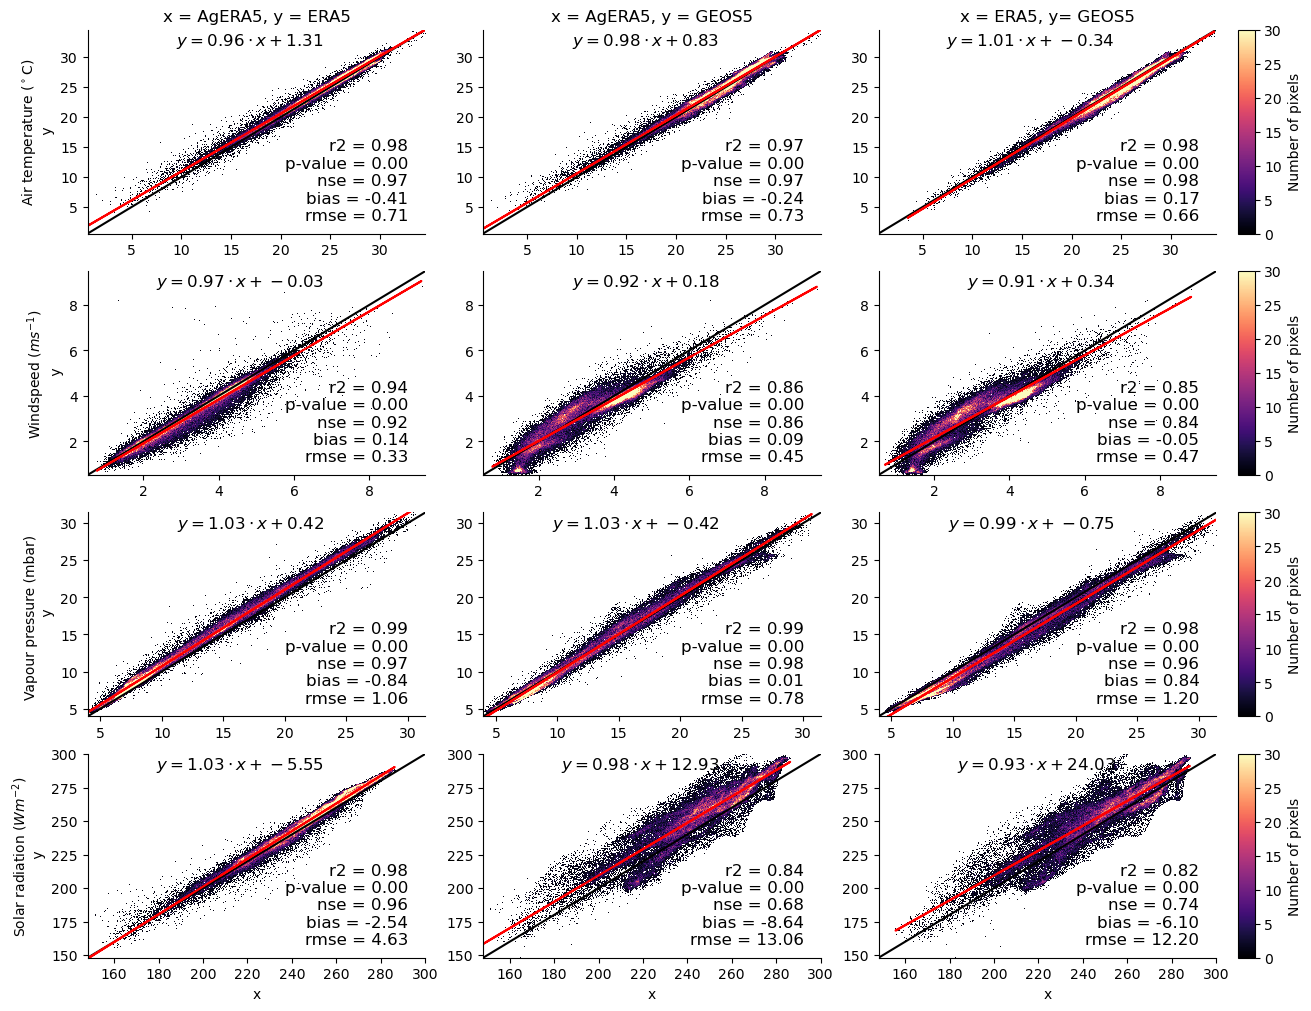

In [20]:
## params
variables=['t_air','u','vp','ra']
var_name = ['Air temperature ($^\circ\mathrm{C}$)', 'Windspeed ($ms^{-1}$)',
            'Vapour pressure (mbar)','Solar radiation ($Wm^{-2}$)']

## plot
fig= plt.figure(figsize=(13, 10), constrained_layout=True)
gs = gridspec.GridSpec(4, 4, width_ratios=[1, 1, 1, 0.05], height_ratios=[1, 1, 1, 1], figure=fig)
axs = [fig.add_subplot(gs[i, j]) for i in range(4) for j in range(3)]
cbar_axs = [fig.add_subplot(gs[i, 3]) for i in range(4)]

for i,axr in enumerate([axs[i:i+3] for i in range(0, 12, 3)]):
    var=variables[i]
    ## Read 2D array as 1D
    values1 = np.reshape(da1[var].values,-1) #reshape 2D to 1D array
    values2 = np.reshape(da2[var].values,-1) #reshape 2D to 1D array
    values3 = np.reshape(da3[var].values,-1) #reshape 2D to 1D array
    
    x1=values1[~np.isnan(values1) & ~np.isnan(values2) & ~np.isnan(values3)]
    x2=values2[~np.isnan(values1) & ~np.isnan(values2) & ~np.isnan(values3)]
    x3=values3[~np.isnan(values1) & ~np.isnan(values2) & ~np.isnan(values3)]
    #
    vmin=float(min(da1[var].min(),da2[var].min(),da3[var].min()))
    vmax=float(max(da1[var].max(),da2[var].max(),da3[var].max()))
    #plot   
    im,z=subplot_density_scatter(x1,x2, ax=axr[0],nmax=30, 
                            spines_opt=None,                           
                             axlim=(vmin,vmax)
                           )
    subplot_density_scatter(x1,x3, ax=axr[1],nmax=30, 
                        spines_opt=None,                       
                        axlim=(vmin,vmax)
                       )
    subplot_density_scatter(x2,x3, ax=axr[2],nmax=30, 
                        spines_opt=None,                       
                        axlim=(vmin,vmax)
                       )
    # cbar  
    cbar = fig.colorbar(z,cax=cbar_axs[i],orientation='vertical',shrink=0.8)
    cbar.ax.set_ylabel('Number of pixels')    
    # cbar= fig.colorbar(im, ax=axs[i, -1], shrink=0.8)  
    # cbar.ax.set_ylabel(var_name[i])  
    # customize
    if i == 0:
        axr[0].set_title('x = AgERA5, y = ERA5')
        axr[1].set_title('x = AgERA5, y = GEOS5')
        axr[2].set_title('x = ERA5, y= GEOS5')
    if i !=3:
        axr[0].set_xlabel('')  
        axr[1].set_xlabel('')  
        axr[2].set_xlabel('')  
    axr[0].set_ylabel(f'{var_name[i]} \n y')      
    axr[1].set_ylabel('')  
    axr[2].set_ylabel('')    


plt.savefig('./figures/all_scatterplots_2018-2022.png',bbox_inches='tight')


<>:3: SyntaxWarning: invalid escape sequence '\c'
<>:3: SyntaxWarning: invalid escape sequence '\c'
C:\Users\ntr002\AppData\Local\Temp\ipykernel_11832\1870073151.py:3: SyntaxWarning: invalid escape sequence '\c'
  var_name = ['Air temperature ($^\circ\mathrm{C}$)', 'Windspeed ($ms^{-1}$)',


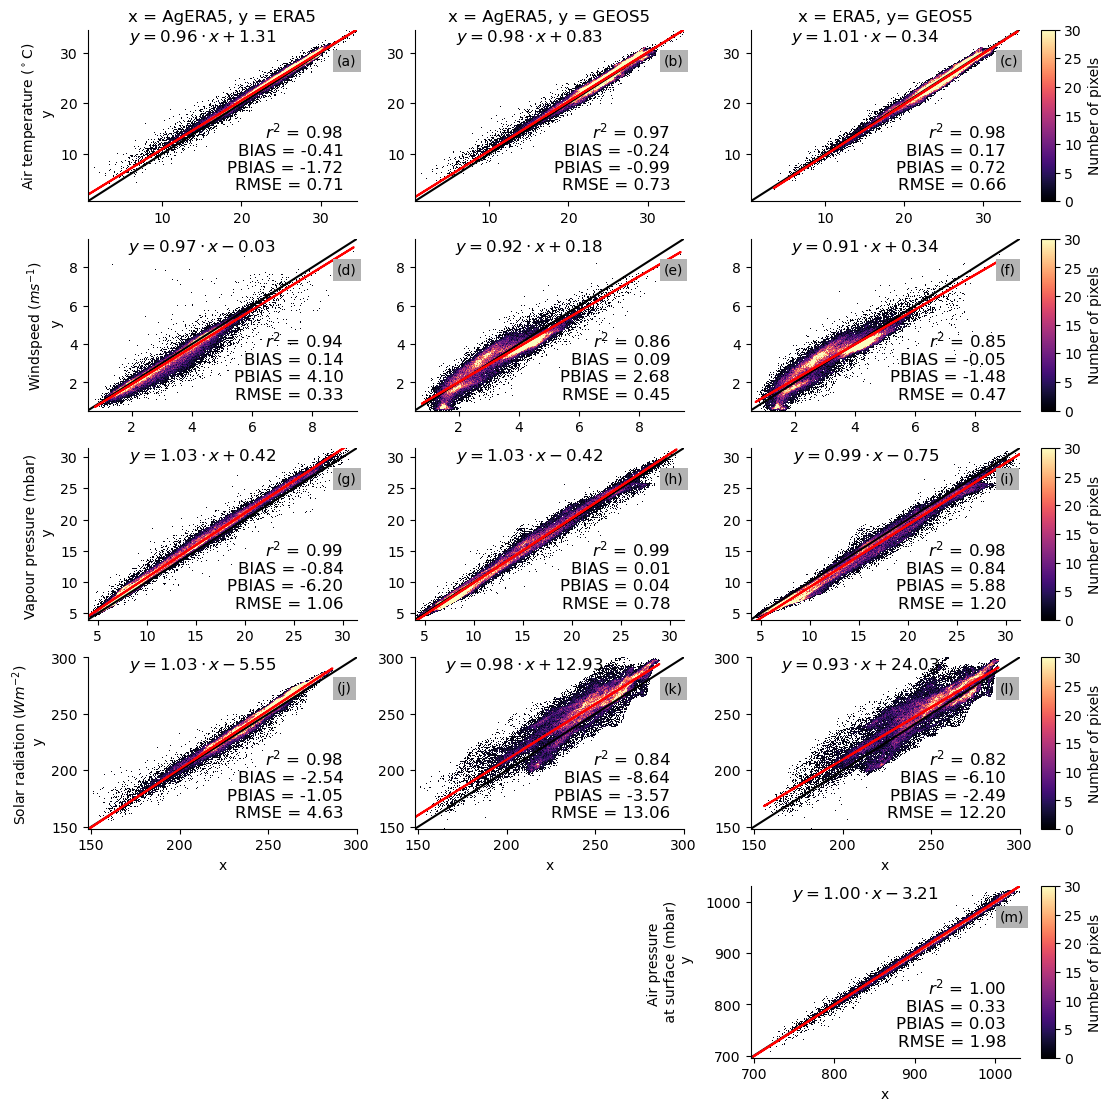

In [7]:
## params
variables=['t_air','u','vp','ra','p_air']
var_name = ['Air temperature ($^\circ\mathrm{C}$)', 'Windspeed ($ms^{-1}$)',
            'Vapour pressure (mbar)','Solar radiation ($Wm^{-2}$)','Air pressure at surface (mbar)']
sublabels = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)','(i)','(j)','(k)','(l)','(m)']
## plot
fig= plt.figure(figsize=(11, 11), constrained_layout=True)
gs = gridspec.GridSpec(5, 4, width_ratios=[1, 1, 1, 0.05], height_ratios=[1,1, 1, 1, 1], figure=fig)
axs = [fig.add_subplot(gs[i, j]) for i in range(4) for j in range(3)]
cbar_axs = [fig.add_subplot(gs[i, 3]) for i in range(4)]

for i,axr in enumerate([axs[i:i+3] for i in range(0, 12, 3)]):
    var=variables[i]
    ## Read 2D array as 1D
    values1 = np.reshape(da1[var].values,-1) #reshape 2D to 1D array
    values2 = np.reshape(da2[var].values,-1) #reshape 2D to 1D array
    values3 = np.reshape(da3[var].values,-1) #reshape 2D to 1D array
    
    x1=values1[~np.isnan(values1) & ~np.isnan(values2) & ~np.isnan(values3)]
    x2=values2[~np.isnan(values1) & ~np.isnan(values2) & ~np.isnan(values3)]
    x3=values3[~np.isnan(values1) & ~np.isnan(values2) & ~np.isnan(values3)]
    #
    vmin=float(min(da1[var].min(),da2[var].min(),da3[var].min()))
    vmax=float(max(da1[var].max(),da2[var].max(),da3[var].max()))
    #plot   
    im,z=subplot_density_scatter(x1,x2, ax=axr[0],nmax=30, 
                            spines_opt=None,                           
                             axlim=(vmin,vmax)
                           )
    subplot_density_scatter(x1,x3, ax=axr[1],nmax=30, 
                        spines_opt=None,                       
                        axlim=(vmin,vmax)
                       )
    subplot_density_scatter(x2,x3, ax=axr[2],nmax=30, 
                        spines_opt=None,                       
                        axlim=(vmin,vmax)
                       )
    # cbar  
    cbar = fig.colorbar(z,cax=cbar_axs[i],orientation='vertical',shrink=0.8)
    cbar.ax.set_ylabel('Number of pixels')    
    # cbar= fig.colorbar(im, ax=axs[i, -1], shrink=0.8)  
    # cbar.ax.set_ylabel(var_name[i])  
    # customize
    if i == 0:
        axr[0].set_title('x = AgERA5, y = ERA5')
        axr[1].set_title('x = AgERA5, y = GEOS5')
        axr[2].set_title('x = ERA5, y= GEOS5')
    if i !=3:
        axr[0].set_xlabel('')  
        axr[1].set_xlabel('')  
        axr[2].set_xlabel('')  
    axr[0].set_ylabel(f'{var_name[i]} \n y')      
    axr[1].set_ylabel('')  
    axr[2].set_ylabel('')   
for i in range(12):
    axs[i].annotate(
    sublabels[i],
    xy=(0.9, 0.9), xycoords='axes fraction',
    xytext=(+0.5, -0.5), textcoords='offset fontsize',
    fontsize='medium', verticalalignment='top', 
    bbox=dict(facecolor='0.7', edgecolor='none', pad=3.0))
#plot p_air      
var=variables[-1]
values2 = np.reshape(da2[var].values,-1) #reshape 2D to 1D array
values3 = np.reshape(da3[var].values,-1) #reshape 2D to 1D array
x2=values2[~np.isnan(values2) & ~np.isnan(values3)]
x3=values3[~np.isnan(values2) & ~np.isnan(values3)]
vmin=float(min(da2[var].min(),da3[var].min()))
vmax=float(max(da2[var].max(),da3[var].max()))
ax=fig.add_subplot(gs[4, 2])
cax=fig.add_subplot(gs[4, 3])
im,z=subplot_density_scatter(x2,x3, ax=ax,nmax=30, 
                        spines_opt=None,                           
                         axlim=(vmin,vmax)
                       )
ax.set_ylabel('')      
cbar = fig.colorbar(z,cax=cax,orientation='vertical',shrink=0.8)
cbar.ax.set_ylabel('Number of pixels') 
ax.annotate(
    sublabels[12],
    xy=(0.9, 0.9), xycoords='axes fraction',
    xytext=(+0.5, -0.5), textcoords='offset fontsize',
    fontsize='medium', verticalalignment='top', 
    bbox=dict(facecolor='0.7', edgecolor='none', pad=3.0))
#add p_air label in other axis
axt=fig.add_subplot(gs[4, 1])
axt.annotate(f'Air pressure \n at surface (mbar) \n y',ha='center',xy=(0.95,0.2), rotation=90)
axt.set_frame_on(False)
axt.set_xticks([])
axt.set_yticks([])

plt.savefig('./figures/all_scatterplots_2018-2022.png',bbox_inches='tight')


# Hovmoller

In [13]:
folder=r"E:\WaPORQA\AgERA5\Processed\Monthly\ERA5_Grid"
fhs = glob.glob(os.path.join(folder,"*.nc"))
ds1=xr.open_mfdataset(fhs,engine='netcdf4',chunks={'time': 10}, parallel=True)  


folder=r"E:\WaPORQA\ERA5\Processed\Monthly"
fhs = glob.glob(os.path.join(folder,"*.nc"))
ds2=xr.open_mfdataset(fhs,engine='netcdf4',chunks={'time': 10}, parallel=True)  


folder=r"E:\WaPORQA\GEOS5\Processed\Monthly\ERA5_Grid"
fhs = glob.glob(os.path.join(folder,"*.nc"))
ds3=xr.open_mfdataset(fhs,engine='netcdf4',chunks={'time': 10}, parallel=True)  


<>:3: SyntaxWarning: invalid escape sequence '\c'
<>:3: SyntaxWarning: invalid escape sequence '\c'
C:\Users\ntr002\AppData\Local\Temp\ipykernel_11832\2974465371.py:3: SyntaxWarning: invalid escape sequence '\c'
  var_name = ['Air temperature ($^\circ\mathrm{C}$)', 'Windspeed ($ms^{-1}$)',


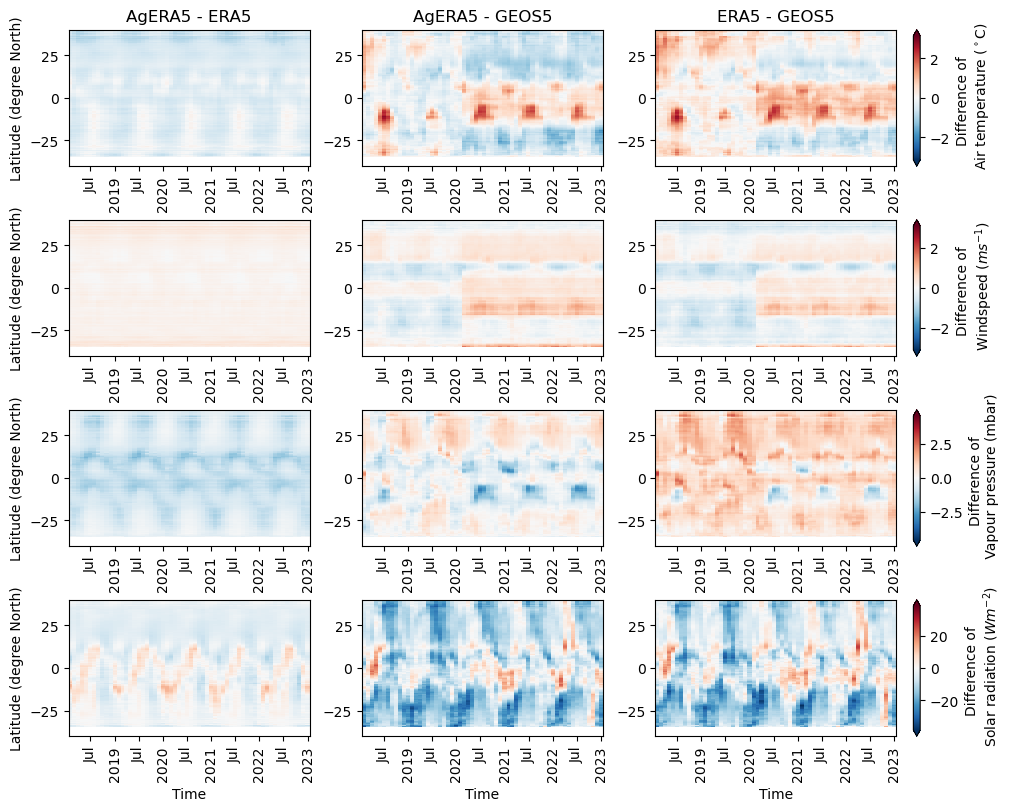

In [14]:
## params
variables=['t_air','u','vp','ra']
var_name = ['Air temperature ($^\circ\mathrm{C}$)', 'Windspeed ($ms^{-1}$)',
            'Vapour pressure (mbar)','Solar radiation ($Wm^{-2}$)']

fig, axs = plt.subplots(4, 3, figsize=(10, 8), layout="constrained")
for i,axr in enumerate(axs):    
    # calculate difference time-series
    var=variables[i]
    da1 = ds1[var]
    da2 = ds2[var]
    da3 = ds3[var]
    da2=da2.where(~da1.isnull(), np.nan)
    da3=da3.where(~da1.isnull(), np.nan)
    diff1_2=(da1-da2)
    diff1_3=(da1-da3)
    diff2_3=(da2-da3)
    diff1_2.compute()
    diff1_3.compute()
    diff2_3.compute()
    #calculate min max
    difmin=float(min(diff1_2.min(),diff1_3.min(),diff2_3.min()))
    difmax=float(max(diff1_2.max(),diff1_3.max(),diff2_3.max()))
    diflim = max(abs(difmin),abs(difmax))/3    
    #plot
    plot_hovmoller(diff1_2, title=None,ax= axr[0],
                         show_cmap=False,
                   dimension=['longitude','latitude'],
                  vmin=-diflim,vmax=diflim
                        )
    plot_hovmoller(diff1_3,title=None, ax= axr[1],     
                         show_cmap=False,
                   dimension=['longitude','latitude'],
                  vmin=-diflim,vmax=diflim
                        )
    plot_hovmoller(diff2_3, title=None,ax= axr[2],
                   varname=f"Difference of \n {var_name[i]}",
                   dimension=['longitude','latitude'],
                  vmin=-diflim,vmax=diflim
                        )
    if i == 0:
        axr[0].set_title('AgERA5 - ERA5')
        axr[1].set_title('AgERA5 - GEOS5')
        axr[2].set_title('ERA5 - GEOS5')
    if i !=3:
        axr[0].set_xlabel('')  
        axr[1].set_xlabel('')  
        axr[2].set_xlabel('')   
    axr[1].set_ylabel('')  
    axr[2].set_ylabel('') 
    for ax in axr:
        ax.tick_params(axis='x', rotation=90)
plt.savefig('./figures/all_hovmoller_2018-2022.png',bbox_inches='tight')

<>:3: SyntaxWarning: invalid escape sequence '\c'
<>:3: SyntaxWarning: invalid escape sequence '\c'
C:\Users\ntr002\AppData\Local\Temp\ipykernel_11832\88607781.py:3: SyntaxWarning: invalid escape sequence '\c'
  var_name = ['Air temperature ($^\circ\mathrm{C}$)', 'Windspeed ($ms^{-1}$)',


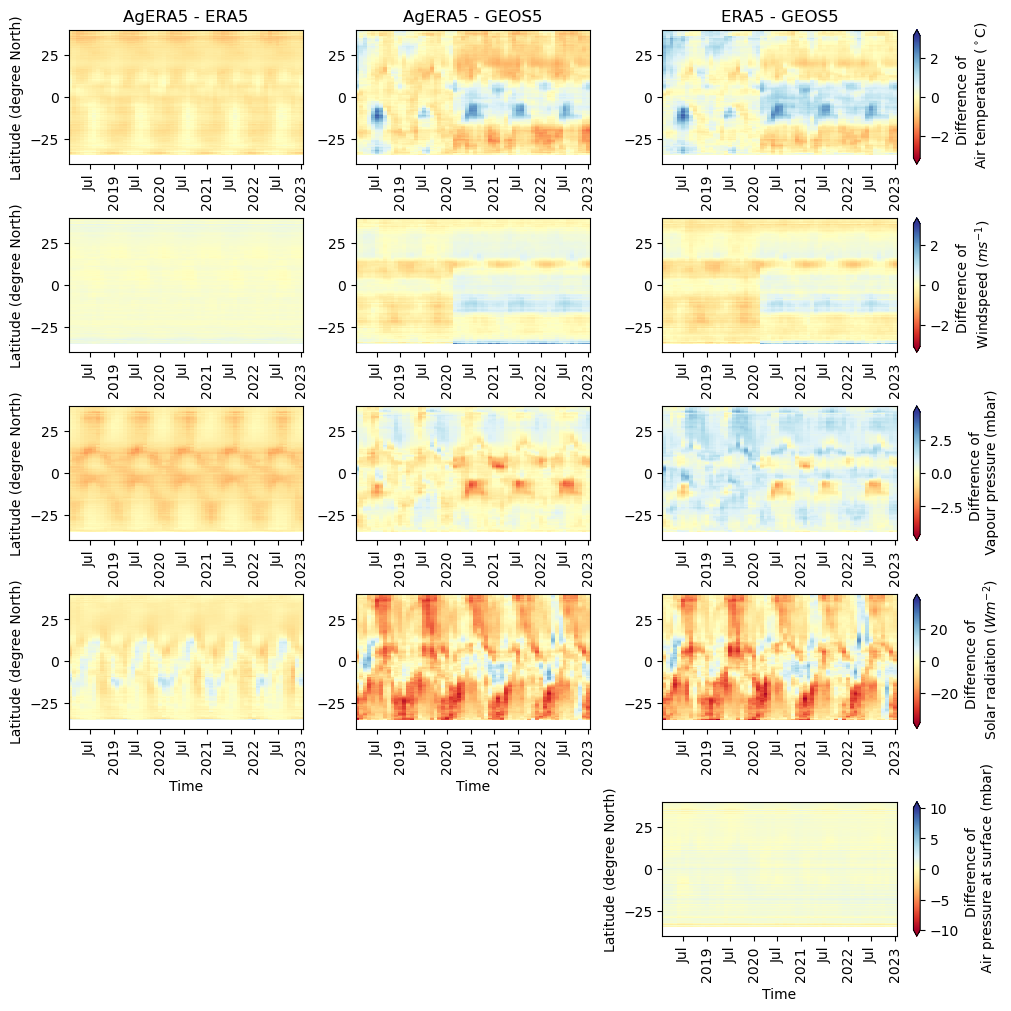

In [16]:
## params
variables=['t_air','u','vp','ra','p_air']
var_name = ['Air temperature ($^\circ\mathrm{C}$)', 'Windspeed ($ms^{-1}$)',
            'Vapour pressure (mbar)','Solar radiation ($Wm^{-2}$)','Air pressure at surface (mbar)']

fig, axs = plt.subplots(5, 3, figsize=(10, 10), layout="constrained")
for i,axr in enumerate(axs):   
    var=variables[i]
    if i ==4:
        da2 = ds2[var]
        da3 = ds3[var]
        da2=da2.where(~ds1['t_air'].isnull(), np.nan)
        da3=da3.where(~ds1['t_air'].isnull(), np.nan)
        diff2_3=(da2-da3)
        diff2_3.compute()
        plot_hovmoller(diff2_3,title=None, ax= axr[2],
                       varname=f"Difference of \n {var_name[i]}",
               dimension=['longitude','latitude'],
              vmin=-10,vmax=10
                    )
        axr[0].set_frame_on(False)
        axr[1].set_frame_on(False)
        axr[0].set_xticks([])
        axr[1].set_xticks([])
        axr[1].set_yticks([])    
        axr[0].set_yticks([])        
    else:         
        axr[1].set_ylabel('')  
        axr[2].set_ylabel('')     
        # calculate difference time-series    
        da1 = ds1[var]
        da2 = ds2[var]
        da3 = ds3[var]
        da2=da2.where(~da1.isnull(), np.nan)
        da3=da3.where(~da1.isnull(), np.nan)
        diff1_2=(da1-da2)
        diff1_3=(da1-da3)
        diff2_3=(da2-da3)
        diff1_2.compute()
        diff1_3.compute()
        diff2_3.compute()
        #calculate min max
        difmin=float(min(diff1_2.min(),diff1_3.min(),diff2_3.min()))
        difmax=float(max(diff1_2.max(),diff1_3.max(),diff2_3.max()))
        diflim = max(abs(difmin),abs(difmax))/3    
        #plot
        plot_hovmoller(diff1_2, title=None,ax= axr[0],
                             show_cmap=False,
                       dimension=['longitude','latitude'],
                      vmin=-diflim,vmax=diflim
                            )
        plot_hovmoller(diff1_3,title=None, ax= axr[1],     
                             show_cmap=False,
                       dimension=['longitude','latitude'],
                      vmin=-diflim,vmax=diflim
                            )
        plot_hovmoller(diff2_3, title=None,ax= axr[2],
                       varname=f"Difference of \n {var_name[i]}",
                       dimension=['longitude','latitude'],
                      vmin=-diflim,vmax=diflim
                            )
        if i == 0:
            axr[0].set_title('AgERA5 - ERA5')
            axr[1].set_title('AgERA5 - GEOS5')
            axr[2].set_title('ERA5 - GEOS5')
        if i !=3:
            axr[0].set_xlabel('') 
            axr[1].set_xlabel('')    
            axr[2].set_xlabel('')  
        else:
            axr[2].set_xlabel('')
        axr[1].set_ylabel('')  
        axr[2].set_ylabel('') 
    for ax in axr:
        ax.tick_params(axis='x', rotation=90)
plt.savefig('./figures/all_hovmoller_2018-2022.png',bbox_inches='tight')

## monthly

<>:3: SyntaxWarning: invalid escape sequence '\c'
<>:3: SyntaxWarning: invalid escape sequence '\c'
C:\Users\ntr002\AppData\Local\Temp\ipykernel_1972\3903355278.py:3: SyntaxWarning: invalid escape sequence '\c'
  var_name = ['Air temperature ($^\circ\mathrm{C}$)', 'Windspeed ($ms^{-1}$)',


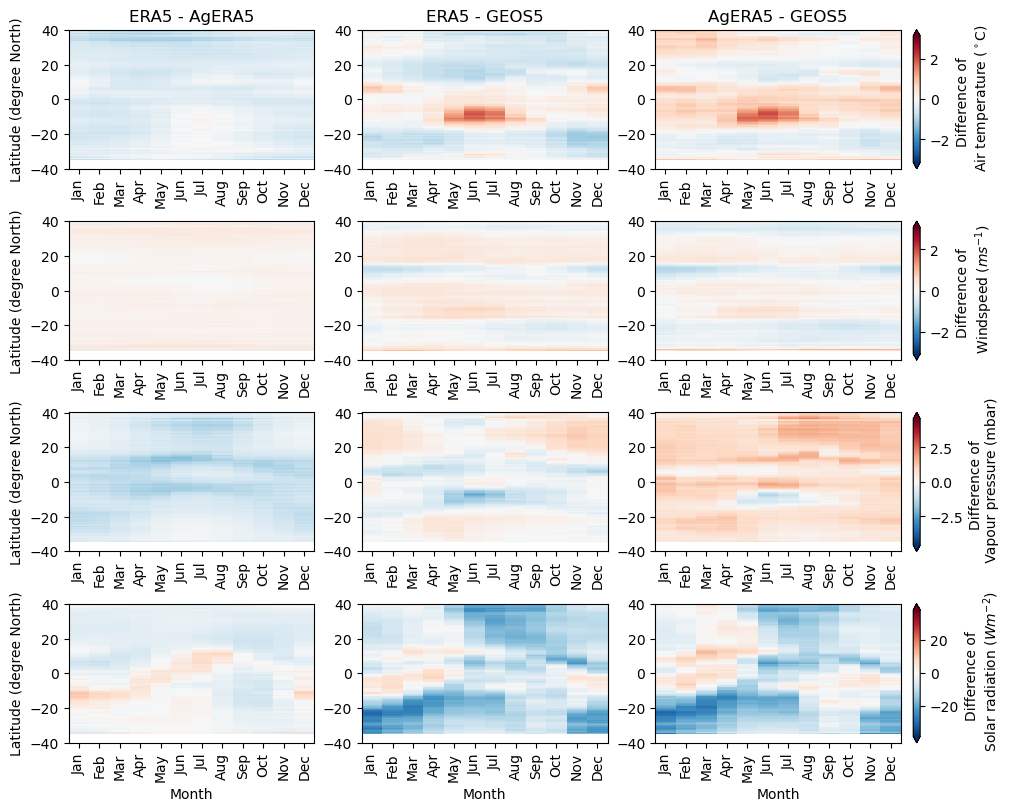

In [50]:
## params
variables=['t_air','u','vp','ra']
var_name = ['Air temperature ($^\circ\mathrm{C}$)', 'Windspeed ($ms^{-1}$)',
            'Vapour pressure (mbar)','Solar radiation ($Wm^{-2}$)']

fig, axs = plt.subplots(4, 3, figsize=(10, 8), layout="constrained")
for i,axr in enumerate(axs):    
    # calculate difference time-series
    var=variables[i]
    da1 = ds1[var]
    da2 = ds2[var]
    da3 = ds3[var]
    da2=da2.where(~da1.isnull(), np.nan)
    da3=da3.where(~da1.isnull(), np.nan)
    diff1_2=(da1-da2)
    diff1_3=(da1-da3)
    diff2_3=(da2-da3)
    diff1_2.compute()
    diff1_3.compute()
    diff2_3.compute()
    #calculate min max
    difmin=float(min(diff1_2.min(),diff1_3.min(),diff2_3.min()))
    difmax=float(max(diff1_2.max(),diff1_3.max(),diff2_3.max()))
    diflim = max(abs(difmin),abs(difmax))/3      
    #plot
    plot_hovmoller_month(diff1_2, title=None,ax= axr[0],
                         show_cmap=False,
                   dimension=['longitude','latitude'],
                  vmin=-diflim,vmax=diflim
                        )
    plot_hovmoller_month(diff1_3,title=None, ax= axr[1],     
                         show_cmap=False,
                   dimension=['longitude','latitude'],
                  vmin=-diflim,vmax=diflim
                        )
    plot_hovmoller_month(diff2_3, title=None,ax= axr[2],
                   varname=f"Difference of \n {var_name[i]}",
                   dimension=['longitude','latitude'],
                  vmin=-diflim,vmax=diflim
                        )
    if i == 0:
        axr[0].set_title('ERA5 - AgERA5')
        axr[1].set_title('ERA5 - GEOS5')
        axr[2].set_title('AgERA5 - GEOS5')
    if i !=3:
        axr[0].set_xlabel('')  
        axr[1].set_xlabel('')  
        axr[2].set_xlabel('')   
    axr[1].set_ylabel('')  
    axr[2].set_ylabel('') 
    for ax in axr:
        ax.tick_params(axis='x', rotation=90)
plt.savefig('./figures/all_hovmoller_month_2018-2022.png',bbox_inches='tight')

<>:3: SyntaxWarning: invalid escape sequence '\c'
<>:3: SyntaxWarning: invalid escape sequence '\c'
C:\Users\ntr002\AppData\Local\Temp\ipykernel_11832\3194652077.py:3: SyntaxWarning: invalid escape sequence '\c'
  var_name = ['Air temperature ($^\circ\mathrm{C}$)', 'Windspeed ($ms^{-1}$)',


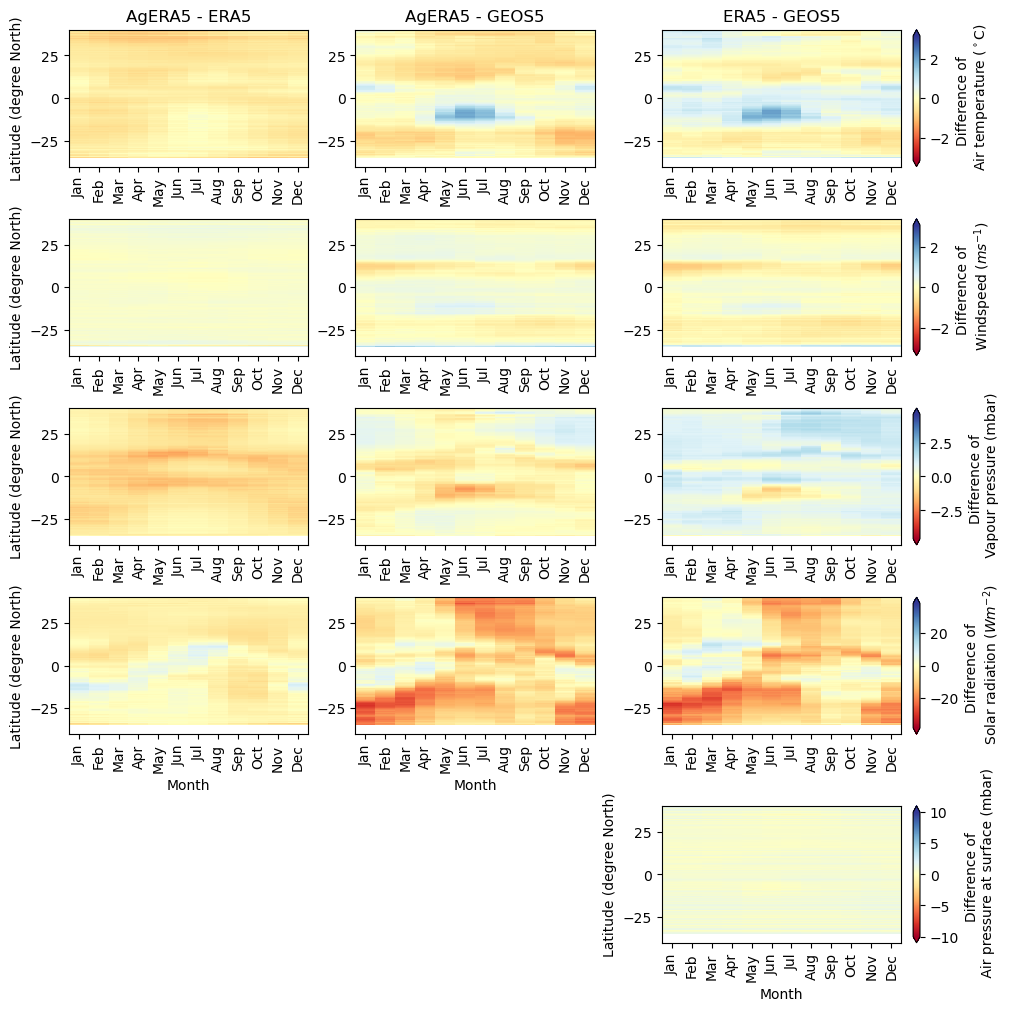

In [17]:
## params
variables=['t_air','u','vp','ra','p_air']
var_name = ['Air temperature ($^\circ\mathrm{C}$)', 'Windspeed ($ms^{-1}$)',
            'Vapour pressure (mbar)','Solar radiation ($Wm^{-2}$)','Air pressure at surface (mbar)']

fig, axs = plt.subplots(5, 3, figsize=(10, 10), layout="constrained")
for i,axr in enumerate(axs):   
    var=variables[i]
    if i ==4:
        da2 = ds2[var]
        da3 = ds3[var]
        da2=da2.where(~ds1['t_air'].isnull(), np.nan)
        da3=da3.where(~ds1['t_air'].isnull(), np.nan)
        diff2_3=(da2-da3)
        diff2_3.compute()
        plot_hovmoller_month(diff2_3,title=None, ax= axr[2],
                       varname=f"Difference of \n {var_name[i]}",
               dimension=['longitude','latitude'],
              vmin=-10,vmax=10
                    )
        axr[0].set_frame_on(False)
        axr[1].set_frame_on(False)
        axr[0].set_xticks([])
        axr[1].set_xticks([])
        axr[1].set_yticks([])    
        axr[0].set_yticks([])        
    else:
        axr[1].set_xlabel('') 
        axr[1].set_ylabel('')  
        axr[2].set_ylabel('')     
        # calculate difference time-series    
        da1 = ds1[var]
        da2 = ds2[var]
        da3 = ds3[var]
        da2=da2.where(~da1.isnull(), np.nan)
        da3=da3.where(~da1.isnull(), np.nan)
        diff1_2=(da1-da2)
        diff1_3=(da1-da3)
        diff2_3=(da2-da3)
        diff1_2.compute()
        diff1_3.compute()
        diff2_3.compute()
        #calculate min max
        difmin=float(min(diff1_2.min(),diff1_3.min(),diff2_3.min()))
        difmax=float(max(diff1_2.max(),diff1_3.max(),diff2_3.max()))
        diflim = max(abs(difmin),abs(difmax))/3    
        #plot
        plot_hovmoller_month(diff1_2, title=None,ax= axr[0],
                             show_cmap=False,
                       dimension=['longitude','latitude'],
                      vmin=-diflim,vmax=diflim
                            )
        plot_hovmoller_month(diff1_3,title=None, ax= axr[1],     
                             show_cmap=False,
                       dimension=['longitude','latitude'],
                      vmin=-diflim,vmax=diflim
                            )
        plot_hovmoller_month(diff2_3, title=None,ax= axr[2],
                       varname=f"Difference of \n {var_name[i]}",
                       dimension=['longitude','latitude'],
                      vmin=-diflim,vmax=diflim
                            )
        if i == 0:
            axr[0].set_title('AgERA5 - ERA5')
            axr[1].set_title('AgERA5 - GEOS5')
            axr[2].set_title('ERA5 - GEOS5')
        if i !=3:
            axr[0].set_xlabel('')     
            axr[1].set_xlabel('')             
            axr[2].set_xlabel('') 
        else:
            axr[2].set_xlabel('') 
        axr[1].set_ylabel('')  
        axr[2].set_ylabel('') 
    for ax in axr:
        ax.tick_params(axis='x', rotation=90)
plt.savefig('./figures/all_hovmoller_month_2018-2022.png',bbox_inches='tight')